# Flower Image Classifier

This is a image classifier to recognize different species of flowers out of 102 flower categories.

## Import Resources

In [2]:
# The new version of dataset is only available in the tfds-nightly package.
%pip --no-cache-dir install tfds-nightly --user
# DON'T MISS TO RESTART THE KERNEL

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.1.0
	• tf.keras version: 2.2.4-tf
	• GPU device not found. Running on CPU


## Load the Dataset


In [7]:
# Download data to default local directory "~/tensorflow_datasets"
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised = True, with_info = True)
#dataset.to_csv('data.csv')





Shuffling and writing examples to C:\Users\navin\tensorflow_datasets\oxford_flowers102\2.1.1.incompleteMI43SY\oxford_flowers102-train.tfrecord
Shuffling and writing examples to C:\Users\navin\tensorflow_datasets\oxford_flowers102\2.1.1.incompleteMI43SY\oxford_flowers102-test.tfrecord
Shuffling and writing examples to C:\Users\navin\tensorflow_datasets\oxford_flowers102\2.1.1.incompleteMI43SY\oxford_flowers102-validation.tfrecord
Dataset oxford_flowers102 downloaded and prepared to C:\Users\navin\tensorflow_datasets\oxford_flowers102\2.1.1. Subsequent calls will reuse this data.
name: "oxford_flowers102"
description: "The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring\nin the United Kingdom. Each class consists of between 40 and 258 images. The images have\nlarge scale, pose and light variations. In addition, there are categories that have large\nvariations within the category and several very similar categories.\n\nThe dataset is divided into 

I0808 10:57:31.773060 19180 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
oxford_flowers102
I0808 10:57:31.774993 19180 download_and_prepare.py:138] download_and_prepare for dataset oxford_flowers102/2.1.1...
I0808 10:57:31.776002 19180 dataset_builder.py:349] Generating dataset oxford_flowers102 (C:\Users\navin\tensorflow_datasets\oxford_flowers102\2.1.1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]


Extraction completed...: 0 file [00:00, ? file/s]I0808 10:57:32.211473 19180 download_manager.py:478] Downloading https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz into C:\Users\navin\tensorflow_datasets\downloads\robots.ox.ac.uk_vgg_flowers_102_102flowersoWedSp98maBn1wypsDib6T-q2NVbO40fwvTflmPmQpY.tgz.tmp.ca40caed3438490eab73c30956de21ca...

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]


Extraction completed...: 0 file [00:00, ? file/s]I0808 10:57:32.214473 19180 do

Dl Completed...:   0%|          | 0/1 [03:43<?, ? url/s]

Dl Size...:  78%|#######8  | 257/328 [03:43<01:15,  1.06s/ MiB]


Extraction completed...: 0 file [03:43, ? file/s]

Dl Completed...:   0%|          | 0/1 [03:45<?, ? url/s]

Dl Size...:  79%|#######8  | 258/328 [03:45<01:18,  1.11s/ MiB]


Extraction completed...: 0 file [03:45, ? file/s]

Dl Completed...:   0%|          | 0/1 [03:46<?, ? url/s]

Dl Size...:  79%|#######8  | 259/328 [03:46<01:19,  1.15s/ MiB]


Extraction completed...: 0 file [03:46, ? file/s]

Dl Completed...:   0%|          | 0/1 [03:47<?, ? url/s]

Dl Size...:  79%|#######9  | 260/328 [03:47<01:15,  1.11s/ MiB]


Extraction completed...: 0 file [03:47, ? file/s]

Dl Completed...:   0%|          | 0/1 [03:48<?, ? url/s]

Dl Size...:  80%|#######9  | 261/328 [03:48<01:12,  1.08s/ MiB]


Extraction completed...: 0 file [03:48, ? file/s]

Dl Completed...:   0%|          | 0/1 [03:49<?, ? url/s]

Dl Size...:  80%|#######9  | 262/328 [03:49<01:12,  1.10s/ MiB]


E

In [8]:
 # Create a training set, a validation set and a test set.
train_set = dataset["train"]
validation_set = dataset["validation"]
test_set = dataset["test"]

## Explore the Dataset

In [9]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=2.1.1,
    description='The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).',
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    total_num_examples=8

In [10]:
# Get the number of examples in each set from the dataset info.
print("No. of training examples : ", dataset_info.splits["train"].num_examples)
print("No. of testing examples : ", dataset_info.splits["test"].num_examples)
print("No. of validation examples : ", dataset_info.splits["validation"].num_examples)

# Get the number of classes in the dataset from the dataset info.
print("The number of classes in this dataset is : ", dataset_info.features["label"].num_classes)

No. of training examples :  1020
No. of testing examples :  6149
No. of validation examples :  1020
The number of classes in this dataset is :  102


In [11]:
# Print the shape and corresponding label of 3 images in the training set.
for image, label in train_set.take(3):
    print("shape : ", image.shape)
    print("label : ", label)

shape :  (500, 667, 3)
label :  tf.Tensor(72, shape=(), dtype=int64)
shape :  (500, 666, 3)
label :  tf.Tensor(84, shape=(), dtype=int64)
shape :  (670, 500, 3)
label :  tf.Tensor(70, shape=(), dtype=int64)


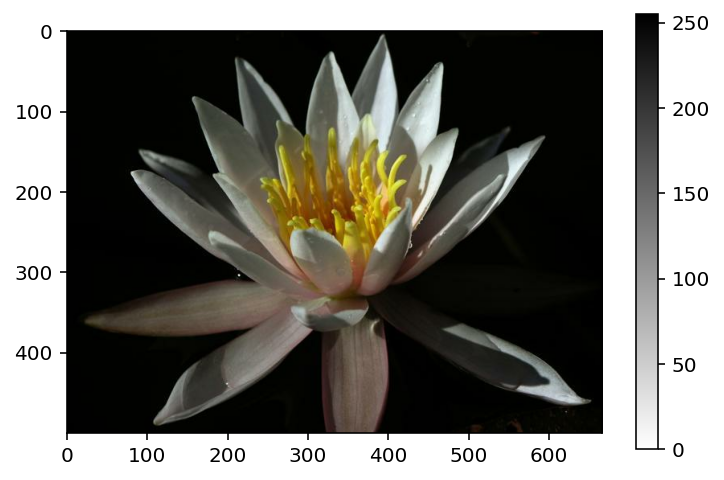

the label of the image is :  72


In [12]:
# Plot 1 image from the training set. 
for image, label in train_set.take(1):
    image = image.numpy().squeeze();
    label = label.numpy()

plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

# Set the title of the plot to the corresponding image label. 
print("the label of the image is : ", label)

### Label Mapping

In [14]:
import json

with open('label_map.json', 'r') as f:
    class_names = json.load(f)

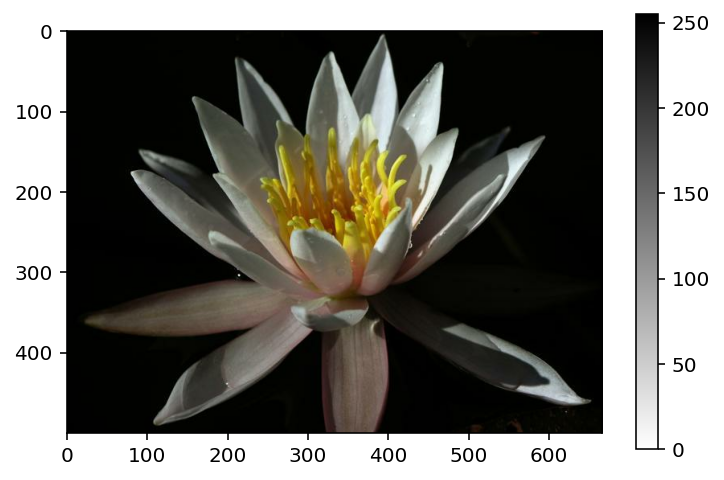

The class of the flower is :  gazania


In [15]:
# Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

for image, label in train_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print("The class of the flower is : ", class_names[str(label-1)])

## Create Pipeline

In [16]:
# Create a pipeline for each set.
image_size = 224
batch_size = 32

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label

training_batches = train_set.map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

# Build and Train the Classifier

In [19]:
!pip install --user "tensorflow_hub>=0.6.0"
!pip install --user "tensorflow>=2.0.0"
import tensorflow_hub as hub

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))

In [20]:
feature_extractor.trainable = False

In [21]:
# TODO: Build and train your network.
EPOCHS = 20
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(102, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
# before training
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

32/32 [==============================] - 2s 48ms/sample - loss: 4.6556 - accuracy: 0.0312


In [24]:
history = model.fit(training_batches,
                    epochs = EPOCHS,
                   validation_data=validation_batches)

Epoch 1/20
32/32 [==============================] - 53s 2s/step - loss: 4.6155 - accuracy: 0.0196 - val_loss: 4.3734 - val_accuracy: 0.0843
Epoch 2/20
32/32 [==============================] - 52s 2s/step - loss: 4.1123 - accuracy: 0.0990 - val_loss: 3.7338 - val_accuracy: 0.2363
Epoch 3/20
32/32 [==============================] - 52s 2s/step - loss: 3.3573 - accuracy: 0.2147 - val_loss: 2.9125 - val_accuracy: 0.4206
Epoch 4/20
32/32 [==============================] - 55s 2s/step - loss: 2.5589 - accuracy: 0.4069 - val_loss: 2.2217 - val_accuracy: 0.5304
Epoch 5/20
32/32 [==============================] - 46s 1s/step - loss: 1.9434 - accuracy: 0.5108 - val_loss: 1.7901 - val_accuracy: 0.6020
Epoch 6/20
32/32 [==============================] - 47s 1s/step - loss: 1.5141 - accuracy: 0.6098 - val_loss: 1.5406 - val_accuracy: 0.6451
Epoch 7/20
32/32 [==============================] - 47s 1s/step - loss: 1.2296 - accuracy: 0.6667 - val_loss: 1.3779 - val_accuracy: 0.6667
Epoch 8/20
32/32 [==

In [25]:
# after training
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

32/32 [==============================] - 1s 25ms/sample - loss: 0.0119 - accuracy: 1.0000


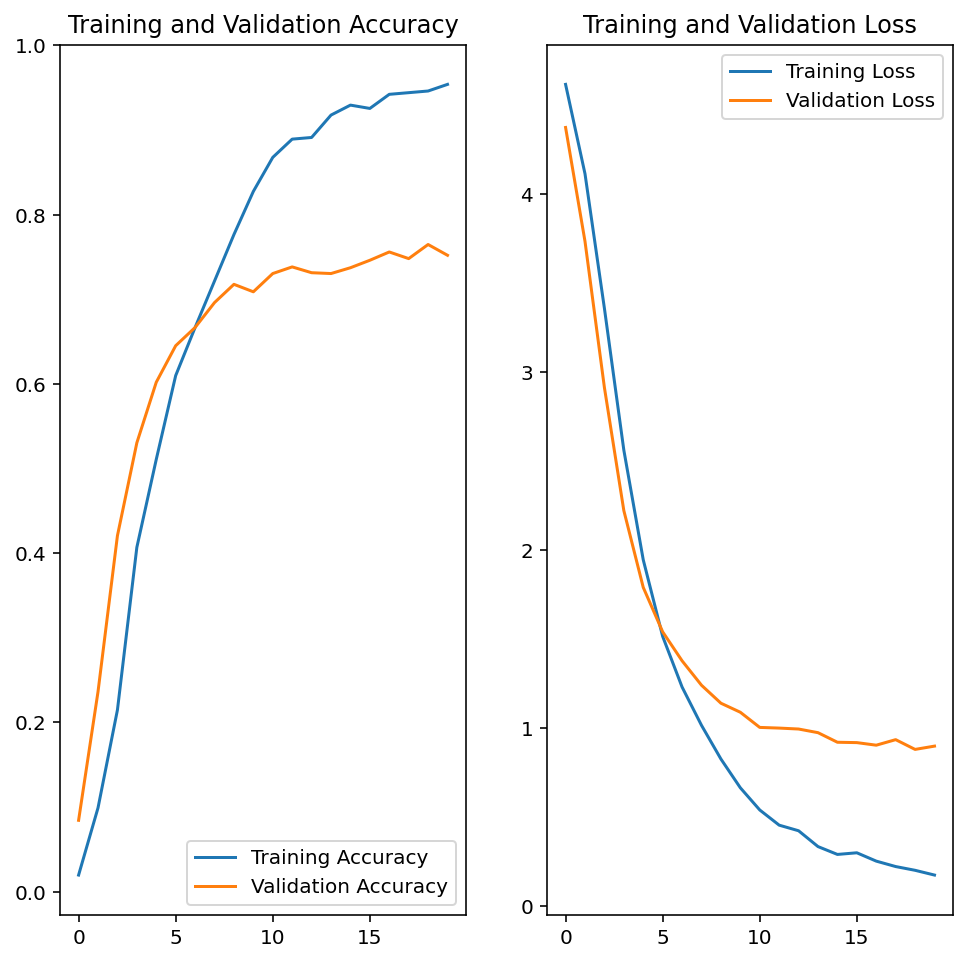

In [26]:
# Plot the loss and accuracy values achieved during training for the training and validation set.

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing your Network

In [27]:
loss,acc = model.evaluate(testing_batches)
print("Loss :",loss,"\nAccuracy :",acc)

    193/Unknown - 149s 770ms/step - loss: 1.0279 - accuracy: 0.7362Loss : 1.0278884408696327 
Accuracy : 0.73621726


## Save the Model
Saving the model for CLI.

In [29]:
# Save your trained model as a Keras model.
saved_keras_model_filepath = './model.h5'

model.save(saved_keras_model_filepath)


 ### Image Pre-processing

In [31]:
# Create the process_image function
def process_image(preprocessed_image):
    image = tf.convert_to_tensor(preprocessed_image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image.numpy()  



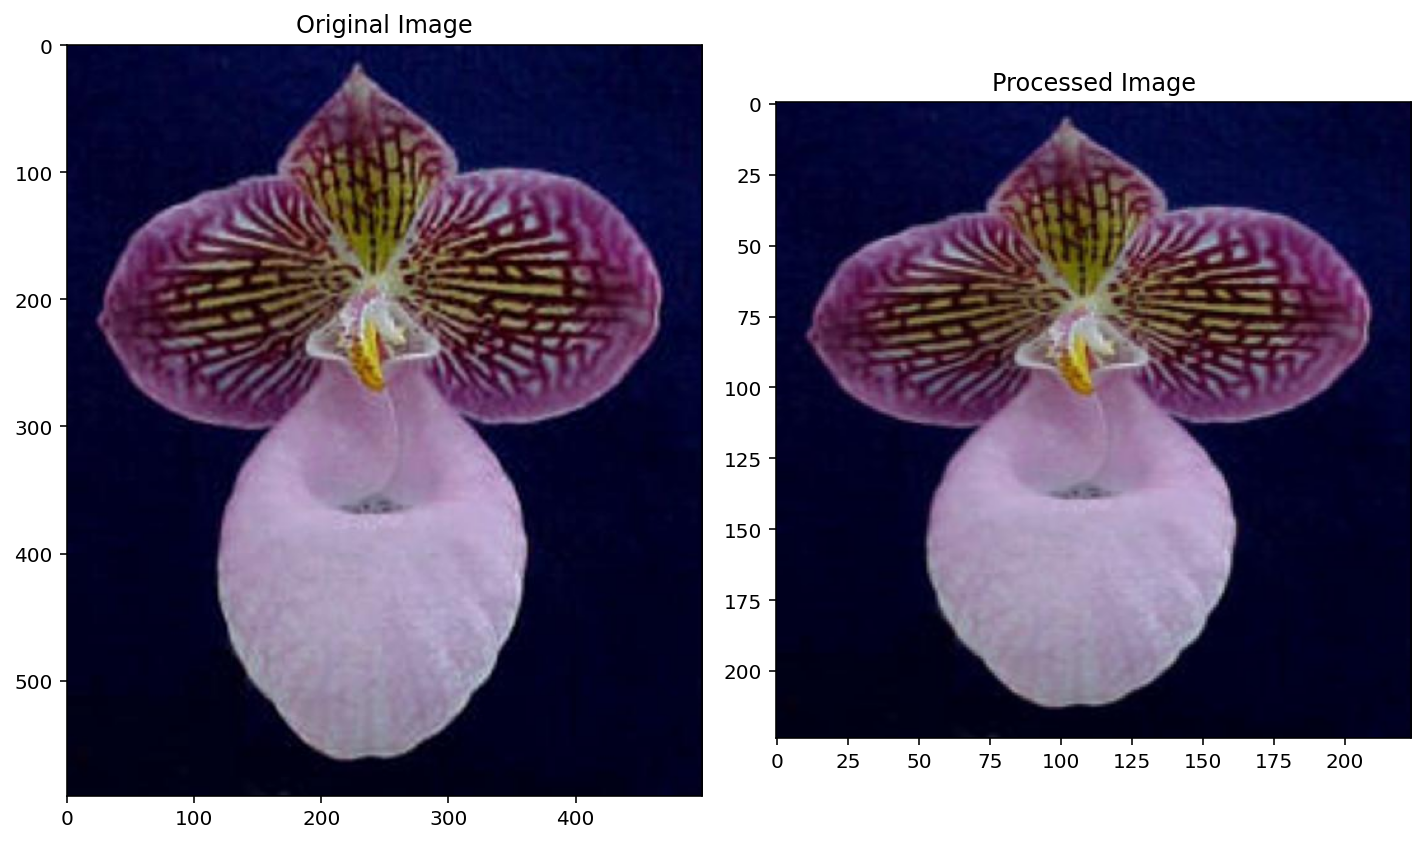

In [32]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [33]:
# Create the predict function
def predict(image_path, model, top_k):
    img = Image.open(image_path)
    processed_img = process_image(np.asarray(img))
    image = np.expand_dims(processed_img, axis=0)
    probs = model.predict(image)
    probs2 = probs[0].tolist()
    #sorted(range(len(a)), key=lambda i: a[i])[-2:]
    #print(sorted(range(len(probs)), key=lambda i: probs[i])[-2:])
    #print(sorted(range(len(probs)), key=lambda i: probs[i], reverse=True)[:2])
    res = sorted(range(len(probs2)), key=lambda i: probs2[i])[-top_k:]
    return probs2, res

# Sanity Check

In [34]:
images = ['./test_images/cautleya_spicata.jpg',
'./test_images/hard-leaved_pocket_orchid.jpg',
'./test_images/orange_dahlia.jpg',
'./test_images/wild_pansy.jpg',]

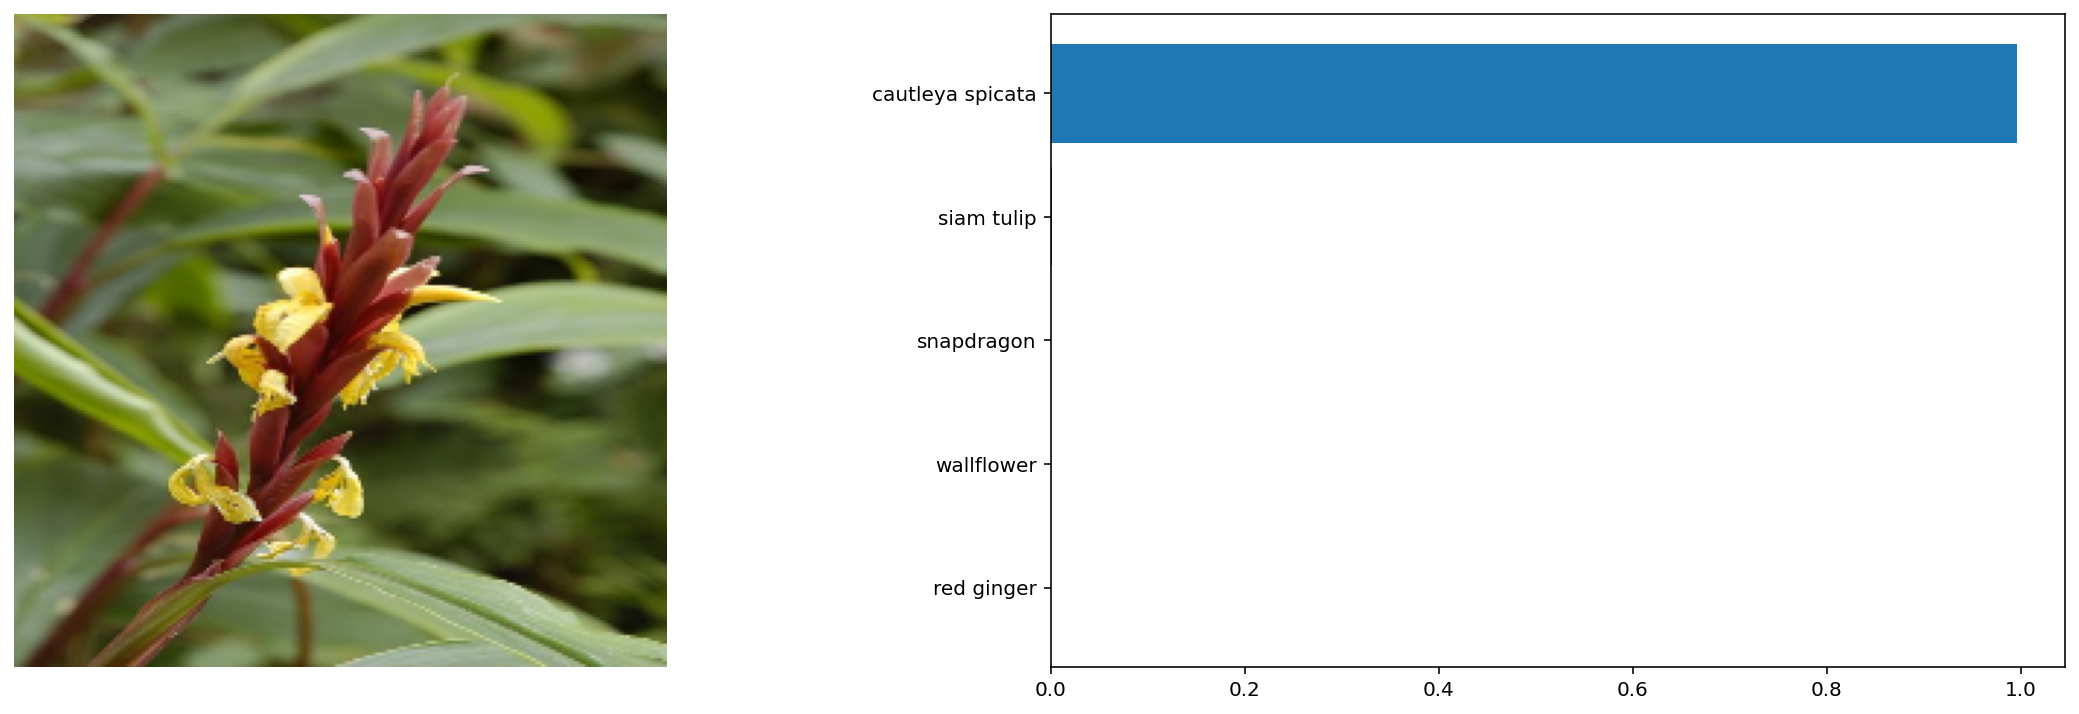

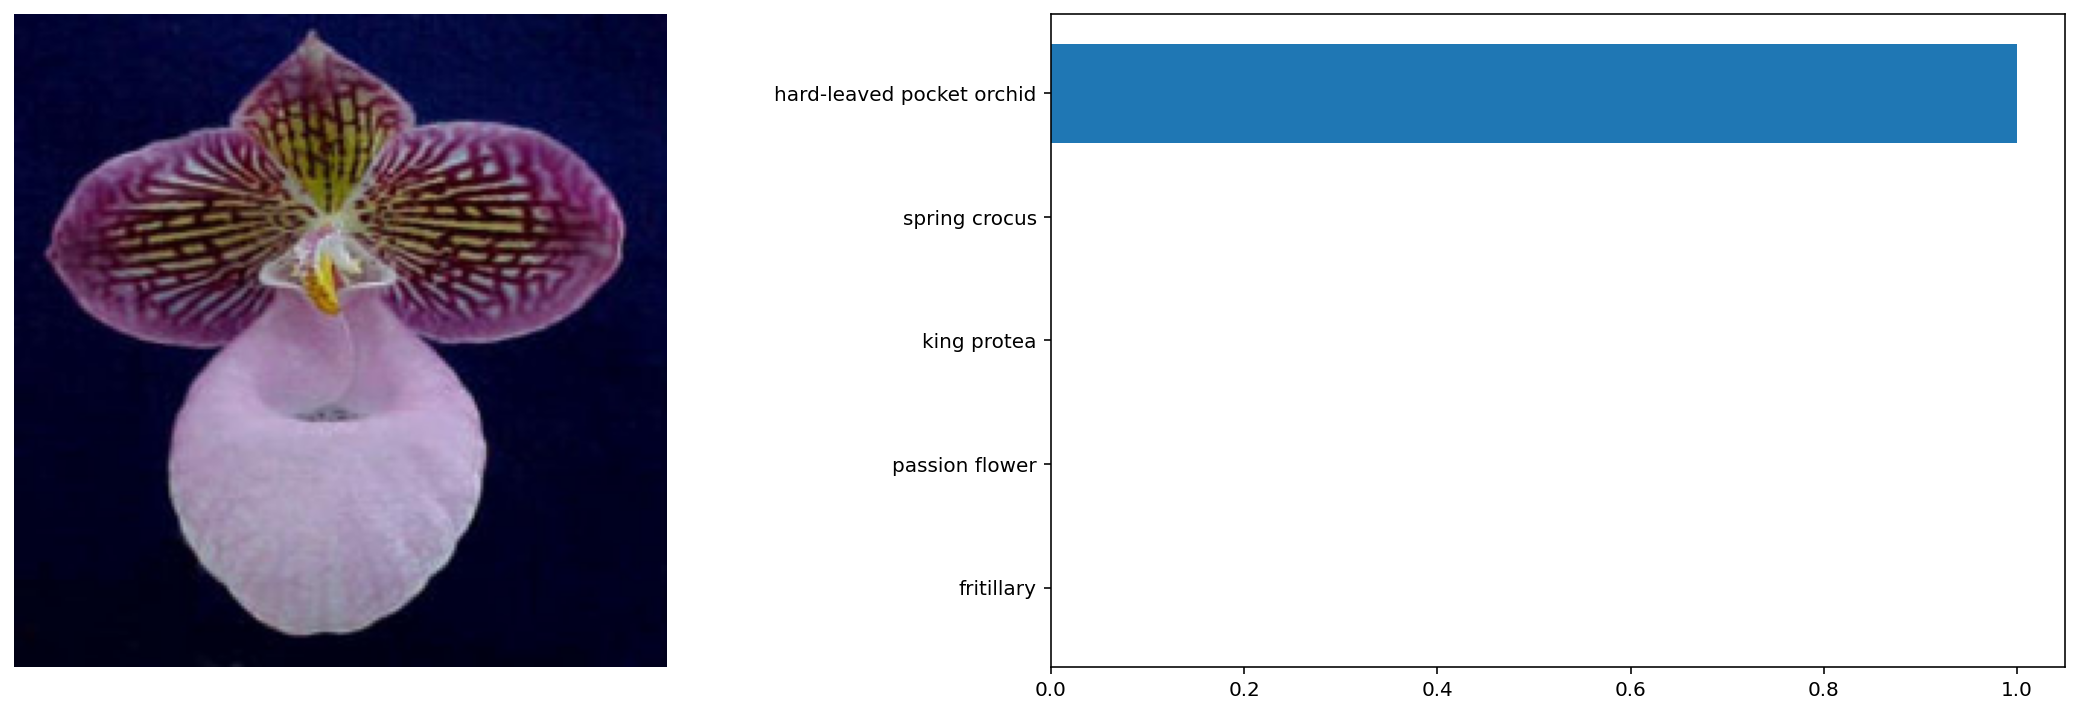

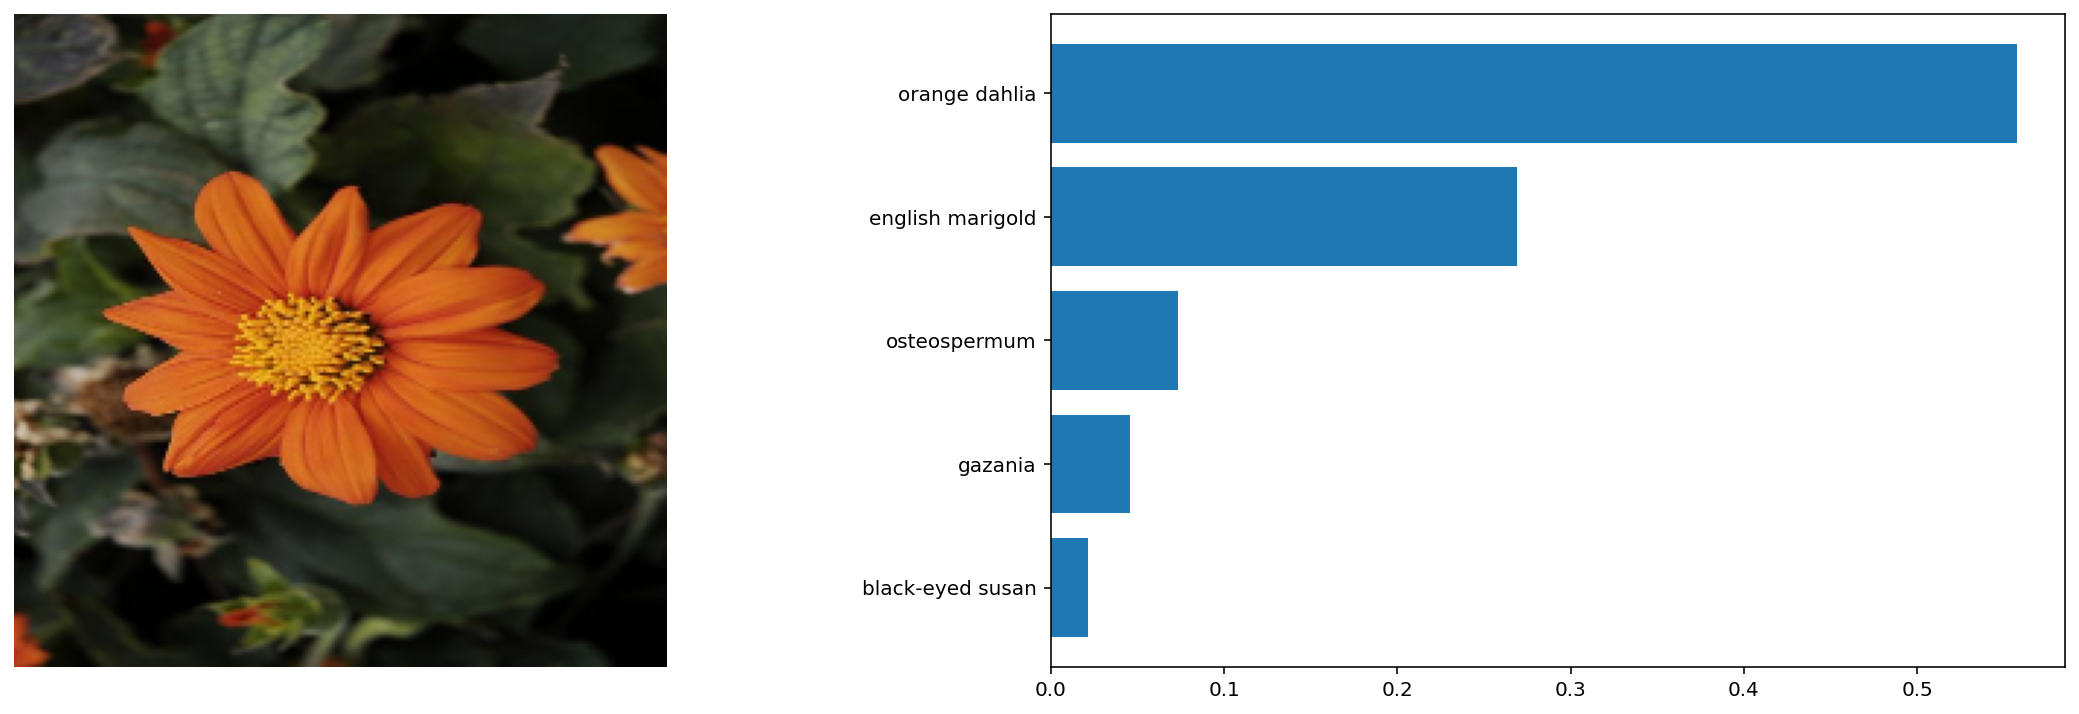

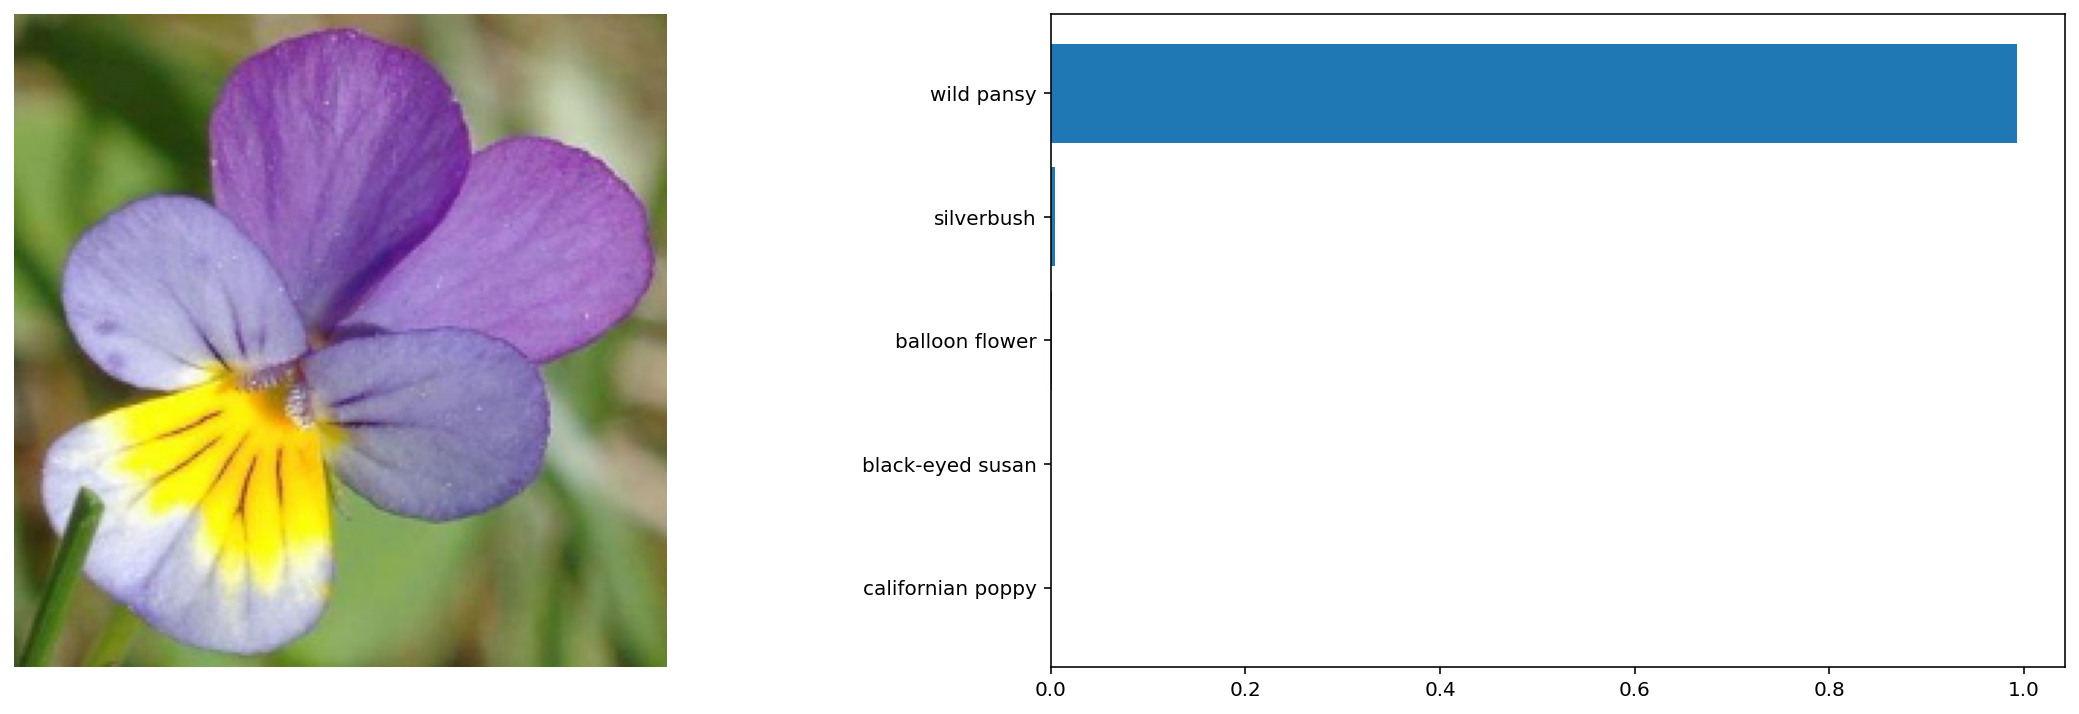

In [35]:
for img in images :
    probs, index = predict(img, model, 5)
    label_names = [class_names[str(i+1)] for i in index]
    label_probs = [probs[i] for i in index]
    
    processed_img = process_image(np.asarray(Image.open(img)))

    fig, (ax1, ax2) = plt.subplots(figsize=(20,6), ncols=2)
    ax1.imshow(processed_img, cmap = plt.cm.binary)
    ax1.axis('off')
    x_pos = np.arange(len(label_names))
    plt.barh(x_pos, label_probs, label="Revenue")
    plt.yticks(x_pos,label_names)



In [36]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook Flower Image Classifier.ipynb to html',
 '[NbConvertApp] Writing 2522530 bytes to Flower Image Classifier.html']